<a href="https://colab.research.google.com/github/skumarudel/DSPS_SKumar/blob/master/HW4/GalRotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing the significance of Dark Matter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#package I will use for constants and units conversion 
import astropy 
import astropy.units as u

in 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that once all of the mass is included, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $\nu \propto \frac{1}{l}r$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)

$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:

$v^2 = \frac{G \cdot m(r)}{r}$

Derive this $v^2\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

**Answer**

For a star to stay in the stable orbit, the centrifugal force and gravitation force needs to compensate each other i.e.

Centrifugal force = Gravitation force

$mw^{2}r = \frac{G m(r) m}{r^{2}}$

where $w$ is rotational velocity of star around a center at a distance $r$
and $w = \frac{v}{r}$

$m(r)$ mass contained inside radius $r$ from center of a galaxy

$m$ is mass of star rotatiing around a center at a distance r

putting value of $w$ in the equation above leads to

$v^{2} = \frac{G m(r)}{r}$



## M31 rotational curve

# Galaxy Rotational Curves
The data comes from [SOFUE 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf)
The data are plotted in Figure 3 and 4 for M31 and the Milky Way respectively, and hosted on [this website](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/)
As described in the paper: 
Long and short bars represent modified standard deviations and errors, respectively

#### Please read the last paragraphs of Section 2.1 of the paper to understand the meaning of these uncertainties:

![figures](https://github.com/skumarudel/DSPS_SKumar/blob/master/HW4/figures.png?raw=1)

### data ingestion
Get the data from the github repository https://github.com/skumarudel/DSPS_SKumar/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.



Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [8]:
m31 = pd.read_csv('https://raw.githubusercontent.com/skumarudel/DSPS_SKumar/master/HW4/m31.csv', comment='#', header=None, names=['r', 'v', 'dv', 'err'])
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [9]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size

In [10]:
m31angS = 3.167*u.deg #deg
disM31 = 765*u.kpc #kpc 
disM31_err = 28*u.kpc #kpc

In [11]:
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


In [12]:
print("Distance of Andromeda: {:.1f} +/- {:.1f}".format(disM31, disM31_err))   #ref https://arxiv.org/abs/1110.3769

Distance of Andromeda: 765.0 kpc +/- 28.0 kpc


In [13]:
print("Size of the visible component of Andromeda {:.2f} +/- {:.2f} kpc".format((disM31 * m31angS.to(u.rad)).value, (disM31_err * m31angS.to(u.rad)).value))

Size of the visible component of Andromeda 42.29 +/- 1.55 kpc


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [14]:
def smallest_radius(data, N, sizelum):
  '''
  This function takes data as dataframe
  N as integer, which defines the number of time the size of luminous radius
  sizelum, this defines the physical size (diameter) of luminous part of galaxy 
  '''
  radlum = sizelum.value / 2.  # radius of luminous mass
  Radius = data[data.r >= N*radlum].iloc[0]
  return Radius



In [15]:
sizelum = disM31 * m31angS.to(u.rad) # physical size of luminous mass
RadVel = smallest_radius(m31,1,sizelum)
print("Smallest radius and velocity is {:.2f}, {:.2f} respectively, where the luminous mass is complelety included".format(RadVel.r, RadVel.v))

Smallest radius and velocity is 23.74, 236.51 respectively, where the luminous mass is complelety included


In [16]:
def plot_GalRot(data, N, sizelum, ax=None):
  if ax == None:
    fig,ax = plt.subplots(figsize=(12,8))
  else:
    ax = ax

  ax.errorbar(x=data.r, y=data.v, yerr=data.err, color='blue', alpha=0.7, elinewidth=4, label='v, err = std err')
  ax.errorbar(x=data.r, y=data.v, yerr=data.dv, color='blue', alpha=0.4, elinewidth=2, label='v, err = std deviation')
  color=['orange', 'green', 'red', 'magenta', 'yellow']
  for i in range(0,int(N)):
    SR = smallest_radius(data,i+1,sizelum)
  #print(SR)
    ax.errorbar(SR.r, SR.v, SR.dv, color=color[i], label='{} x radius'.format(i+1))
    ax.text(x=SR.r, y=SR.v-1.15*SR.dv, s = "{:.1f}".format(SR.v), ha='center', va='bottom', weight='bold', fontsize=12)
    ax.text(x=SR.r, y=SR.v-1.15*SR.dv, s = "({:.1f}, {:.1f})".format(SR.dv, SR.err), ha='center', va='top', weight='bold',fontsize=12)

  ax.set_xlim(0,85)
  ax.set_xlabel('radius (kpc)', fontsize=12)
  ax.set_ylabel('velocity (km/s)', fontsize=12)
  ax.legend();

  


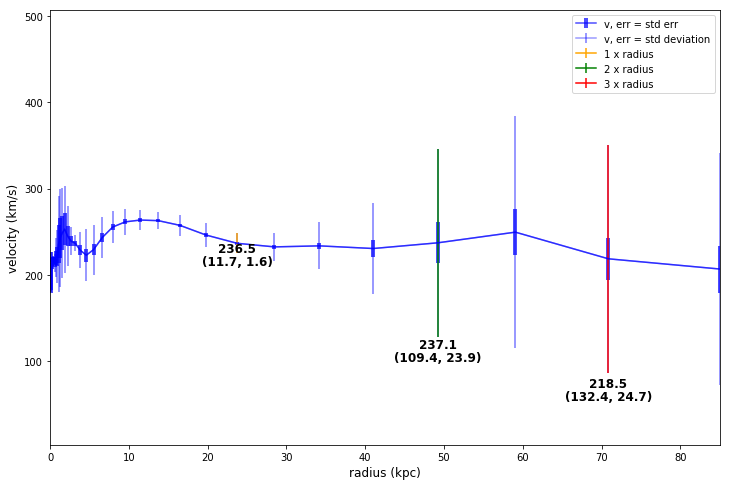

In [17]:
#Let us plot the velocity as a function of velocity
plot_GalRot(data=m31,N=3,sizelum=sizelum)

**M31 rotational curve:** Above plot shows the velocity of satellite galaxies and globular clusters as a function of radius from the center of the M31. Orange(1), green(2) and red(3) lines highlight the value of velocities and associated errors as a multiple of minimum distance containing luminous size of M31 

In [18]:
def vratios(data, N, sizelum, err='dv'):
  '''
  Function ot calculate the ratio of radius and ratio of velocity from the observed data with uncertainties
  It also calculate the ratio of velocity vs ratio of radius for the expected results (Newton's law) v2/v1 = sqrt(r1/r2)
  '''
  df_radius_1 = smallest_radius(data, 1, sizelum)
  df_radius_N = smallest_radius(data, N, sizelum)
  ratio_radius = df_radius_N.r / df_radius_1.r
  ratio_velocity = df_radius_N.v / df_radius_1.v
  if err == 'dv':
    ratio_velocity_err = abs(df_radius_N.v / df_radius_1.v) * np.sqrt((df_radius_N.dv / df_radius_N.v)**2 + (df_radius_1.dv / df_radius_1.v)**2)
  elif err == 'err':
    ratio_velocity_err = abs(df_radius_N.v / df_radius_1.v) * np.sqrt((df_radius_N.err / df_radius_N.v)**2 + (df_radius_1.err / df_radius_1.v)**2)
  expected_velocity_ratio = np.sqrt(df_radius_1.r / df_radius_N.r)

  return ratio_radius, ratio_velocity, ratio_velocity_err, expected_velocity_ratio

In [19]:
def plot_vratios(data, N, sizelum, sigma_err = 2):
  fig,axes = plt.subplots(1,2,figsize=(15,6))
  for i in range(1,N):
    data_dv = vratios(data,i,sizelum, err='dv')
    data_err = vratios(data,i,sizelum, err='err')
    axes[0].errorbar(data_dv[0], data_dv[1], yerr=sigma_err*data_dv[2], marker='o', color='blue', label="observed" if i == 1 else "")
    axes[0].plot(data_dv[0], data_dv[3], marker='s', linestyle='', color='green', label='expected' if i == 1 else "" )

    axes[1].errorbar(data_err[0], data_err[1], yerr=sigma_err*data_err[2], marker='o', color='blue', label="observed" if i == 1 else "")
    axes[1].plot(data_err[0], data_err[3], marker='s', linestyle='', color='green', label='expected' if i == 1 else "" )



  axes[0].legend(loc='lower left')
  axes[0].set_xlabel('Ratio of Radius [N*r/r]')
  axes[0].set_ylabel('Ratio of velocities')
  axes[0].set_title('Using {} sigma Standard deviation err'.format(sigma_err))


  axes[1].legend(loc='lower left')
  axes[1].set_xlabel('Ratio of Radius [N*r/r]')
  axes[1].set_ylabel('Ratio of velocities');
  axes[1].set_title('Using {} sigma err'.format(sigma_err));
  #plt.title('M31 galaxy');



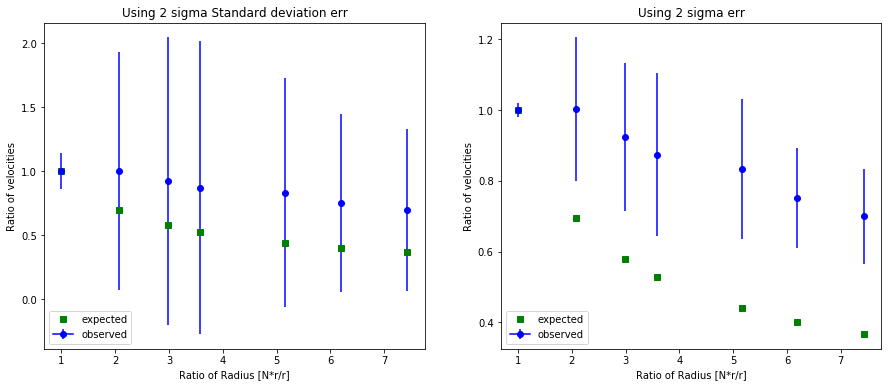

In [20]:
plot_vratios(m31,8,sizelum,sigma_err=2)

**M31**:Above plot shows the ratio of velocities as a function of ratio of radius for both observed and expected (Newton's law) results. The errors on the observed points (blue points) are 2 sigma error. Left plot shows when I use standard deviation as error and right plot shows when I use error around mean in that bin (std / sqrt(bin_count)). Clearly the expected points (green points) on the left plot are consistent within 2 sigma errors with the observation points, whereas the expected points on the right plots are inconsistent within 2 sigma errors with observational data. Therefore, there must be more mass than the mass in the luminous size to have larger velocity ratio than expected. This is the first indirect proof of existence of dark matter. Therefore, Newton's law can be excluded at 2 sigma significance. 

# Similar calculations for milkyway galaxy

In [21]:
mw = pd.read_csv('https://raw.githubusercontent.com/skumarudel/DSPS_SKumar/master/HW4/mw.csv', comment='#', skiprows=[1], names=['r', 'v', 'dv', 'err'])

In [22]:
mw.head()

,r,v,dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [23]:
#stellar disk size is 185 +/- 15 klyr       ----> ref https://en.wikipedia.org/wiki/Milky_Way
mw_size = 185 *u.klyr.to(u.kpc) * u.kpc
mw_size_err = 15 *u.klyr.to(u.kpc) * u.kpc


In [24]:
print("Size of the visible component of Milky way {:.2f} +/- {:.2f}".format(mw_size, mw_size_err))

Size of the visible component of Milky way 56.72 kpc +/- 4.60 kpc


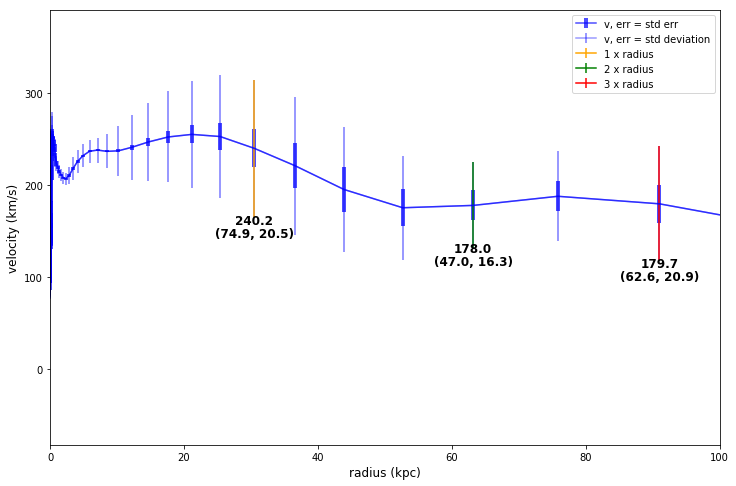

In [25]:
fig,ax = plt.subplots(figsize=(12,8))
plot_GalRot(data=mw, N=3, sizelum=mw_size,ax=ax)
ax.set_xlim(0,100);

**Milky way rotational curve:** Above plot shows the velocity of satellite galaxies and globular clusters as a function of radius from the center of the M31. Orange(1), green(2) and red(3) lines highlight the value of velocities and associated errors as a multiple of minimum distance containing luminous size of Milky way

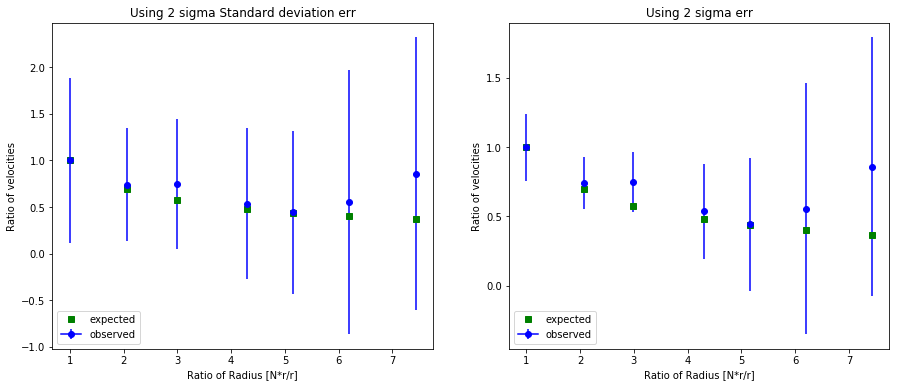

In [26]:
plot_vratios(mw,8,sizelum=mw_size,sigma_err=2)

**Milky way:** Above plot shows the ratio of velocities as a function of ratio of radius for both observed and expected (Newton's law) results. The errors on the observed points (blue points) are 2 sigma error. Left plot shows when I use standard deviation as error and right plot shows when I use error around mean in that bin (std/sqrt(bin count)). Clearly the expected points (green points) on the left and right plot are consistent within 2 sigma errors with the observation points. Therefore, we can not exclude the Newton's law to explain the observations. 

---

<h1 style="color:red"> Awesome !</h1>
